# Quantitative market analysis of haircare products trade flow between China and USA compared to CHINA and the WORLD


Data obtained from https://comtrade.un.org/data/ studying Commodity code: 3305 and all variations. To final results refer to the last part of the code

Created by @MoisesBarbera

https://www.github.com/MoisesBarbera // https://www.kaggle.com/moisesbarbera // https://www.linkedin.com/in/moises-barbera-ramos-8a3848164/

moisesphysics@gmail.com

In [682]:
import pandas as pd
import numpy as np
from pylab import *
import matplotlib.pyplot as plt
plt.rcParams['axes.grid'] = True
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [683]:
China_World2018 = pd.read_csv('CHINA-WORLD2018.csv', dtype={'Commodity Code':str, 'Trade Value (US$)':int32})
China_World2018.head() #Uploading the data for exports and imorts from China with the World in 2018 (later on found to be inaccessible, aalthouh not afecting ouranalysis)

,Classification,Year,Period,Period Desc.,Trade Flow,Reporter Code,Reporter,Partner,Commodity Code,Commodity,Netweight (kg),Trade Value (US$)
0,HS,2018,201801,Jan-18,Imports,710,South Africa,China,3305,Hair preparations; for use on the hair,70930.0,182707
1,HS,2018,201803,Mar-18,Imports,710,South Africa,China,3305,Hair preparations; for use on the hair,42166.0,83821
2,HS,2018,201804,Apr-18,Imports,710,South Africa,China,3305,Hair preparations; for use on the hair,15699.0,31430
3,HS,2018,201802,Feb-18,Imports,710,South Africa,China,3305,Hair preparations; for use on the hair,62737.0,181705
4,HS,2018,201804,Apr-18,Exports,724,Spain,China,330510,Hair preparations; shampoos,4298.0,17987


In [684]:
COLUMNS = ['Year', 'Trade Flow', 'Trade Value (US$)', 'Netweight (kg)', 'Commodity Code', 'Trade Value (US$)' ]
China_World2018 = China_World2018[COLUMNS]
China_World2018.head() #Selecting the columns to work with on this table

,Year,Trade Flow,Trade Value (US$),Netweight (kg),Commodity Code,Trade Value (US$)
0,2018,Imports,182707,70930.0,3305,182707
1,2018,Imports,83821,42166.0,3305,83821
2,2018,Imports,31430,15699.0,3305,31430
3,2018,Imports,181705,62737.0,3305,181705
4,2018,Exports,17987,4298.0,330510,17987


In [685]:
China_World2018.groupby(['Year'])[('Trade Value (US$)')].aggregate(sum) #Total revenue from WORLD relations with CHINA in 2018

Year                   
2018  Trade Value (US$)    69472864
      Trade Value (US$)    69472864
Name: Trade Value (US$), dtype: int64

In [686]:
China_USA2018 = pd.read_csv('CHINA-USA2018.csv') #Uploading the data for exports and imorts from China with the USA in 2018
COLUMNS = ['Year', 'Trade Flow', 'Trade Value (US$)', 'Netweight (kg)', 'Commodity Code', 'Trade Value (US$)']
China_USA2018 = China_USA2018[COLUMNS] #Selecting the columns to work with on this table
China_USA2018.head(10)

,Year,Trade Flow,Trade Value (US$),Netweight (kg),Commodity Code,Trade Value (US$)
0,2018,Imports,5774354,1363551,3305,5774354
1,2018,Imports,6897292,1568554,3305,6897292
2,2018,Imports,6034148,1302048,3305,6034148
3,2018,Imports,4159031,1016229,3305,4159031
4,2018,Imports,6152496,1450878,3305,6152496
5,2018,Exports,1491287,0,3305,1491287
6,2018,Exports,931412,0,3305,931412
7,2018,Imports,4706147,1012400,3305,4706147
8,2018,Exports,1998682,485585,3305,1998682
9,2018,Imports,6235162,1361080,3305,6235162


In [687]:
China_USA_Import2018 = China_USA2018[China_USA2018['Trade Flow'] != 'Export'] 
China_USA_Import2018.head() #Showing only the imported values

,Year,Trade Flow,Trade Value (US$),Netweight (kg),Commodity Code,Trade Value (US$)
0,2018,Imports,5774354,1363551,3305,5774354
1,2018,Imports,6897292,1568554,3305,6897292
2,2018,Imports,6034148,1302048,3305,6034148
3,2018,Imports,4159031,1016229,3305,4159031
4,2018,Imports,6152496,1450878,3305,6152496


In [688]:
China_USA_Import2018.groupby(['Year'])[('Trade Value (US$)')].aggregate(sum) #Total expenses from Imports

Year                   
2018  Trade Value (US$)    114797336
      Trade Value (US$)    114797336
Name: Trade Value (US$), dtype: int64

In [689]:
China_USA_Export2018 = China_USA2018[China_USA2018['Trade Flow'] != 'Import']
China_USA_Export2018.head() #Showing only the exported values

,Year,Trade Flow,Trade Value (US$),Netweight (kg),Commodity Code,Trade Value (US$)
0,2018,Imports,5774354,1363551,3305,5774354
1,2018,Imports,6897292,1568554,3305,6897292
2,2018,Imports,6034148,1302048,3305,6034148
3,2018,Imports,4159031,1016229,3305,4159031
4,2018,Imports,6152496,1450878,3305,6152496


In [690]:
China_World = pd.read_csv('Haircare CHINA-WORLD.csv') #Uploading the data for exports and imorts from China with the World between 2014 and 2017
China_World.head()

,Classification,Year,Aggregate Level,Trade Flow,Reporter Code,Reporter,Reporter ISO,Partner,Partner ISO,Commodity Code,Commodity,Qty Unit,Qty,Alt Qty Unit,Netweight (kg),Trade Value (US$)
0,H5,2017,4,Import,156,China,CHN,World,WLD,3305,Hair preparations; for use on the hair,Weight in kilograms,NaN,43715047,43715047,347756330
1,H5,2017,4,Export,156,China,CHN,World,WLD,3305,Hair preparations; for use on the hair,Weight in kilograms,NaN,96574233,96574233,266020875
2,H5,2017,6,Import,156,China,CHN,World,WLD,330510,Hair preparations; shampoos,Weight in kilograms,NaN,28418948,28418948,183842298
3,H5,2017,6,Export,156,China,CHN,World,WLD,330510,Hair preparations; shampoos,Weight in kilograms,NaN,57766042,57766042,118788938
4,H5,2017,6,Import,156,China,CHN,World,WLD,330520,Hair preparations; for permanent waving or str...,Weight in kilograms,NaN,391687,391687,2678514


In [691]:
COLUMNS = ['Year', 'Trade Flow', 'Trade Value (US$)', 'Netweight (kg)', 'Commodity Code', 'Trade Value (US$)']
China_World = China_World[COLUMNS] #Selecting the columns to work with on this table
China_World

,Year,Trade Flow,Trade Value (US$),Netweight (kg),Commodity Code,Trade Value (US$)
0,2017,Import,347756330,43715047,3305,347756330
1,2017,Export,266020875,96574233,3305,266020875
2,2017,Import,183842298,28418948,330510,183842298
3,2017,Export,118788938,57766042,330510,118788938
4,2017,Import,2678514,391687,330520,2678514
5,2017,Export,5370813,1447114,330520,5370813
6,2017,Import,4771535,444358,330530,4771535
7,2017,Export,18604804,6011075,330530,18604804
8,2017,Import,156463983,14460053,330590,156463983
9,2017,Export,123256320,31350002,330590,123256320


In [692]:
China_World_Import = China_World[China_World['Trade Flow'] != 'Export']
China_World_Import #Showing only the imported values

,Year,Trade Flow,Trade Value (US$),Netweight (kg),Commodity Code,Trade Value (US$)
0,2017,Import,347756330,43715047,3305,347756330
2,2017,Import,183842298,28418948,330510,183842298
4,2017,Import,2678514,391687,330520,2678514
6,2017,Import,4771535,444358,330530,4771535
8,2017,Import,156463983,14460053,330590,156463983
10,2014,Import,131158234,18956031,3305,131158234
12,2015,Import,237612714,29328468,3305,237612714
14,2016,Import,266517184,38841663,3305,266517184
16,2014,Import,61918603,10717066,330510,61918603
18,2015,Import,128261391,18591669,330510,128261391


In [693]:
#Obtaining the total expenses on imports per year from the World
Y_2017 = China_World_Import[China_World_Import['Year'] == 2017]  
Y_2016 = China_World_Import[China_World_Import['Year'] == 2016]
Y_2015 = China_World_Import[China_World_Import['Year'] == 2015]
Y_2014 = China_World_Import[China_World_Import['Year'] == 2014]


df_Import = pd.DataFrame({'Year' : ['2017', '2016', '2015', '2014'],
                           'count' : [sum(Y_2017['Netweight (kg)']), sum(Y_2016['Netweight (kg)']),
                                      sum(Y_2015['Netweight (kg)']), sum(Y_2014['Netweight (kg)'])]})
df_Import

,Year,count
0,2017,87430093
1,2016,77683326
2,2015,58656935
3,2014,37912062


In [694]:
China_World_Import.groupby(['Year'])[('Trade Value (US$)')].aggregate(sum) #Easier method to perform above piece of code

Year                   
2014  Trade Value (US$)    262316468
      Trade Value (US$)    262316468
2015  Trade Value (US$)    475225428
      Trade Value (US$)    475225428
2016  Trade Value (US$)    533034368
      Trade Value (US$)    533034368
2017  Trade Value (US$)    695512660
      Trade Value (US$)    695512660
Name: Trade Value (US$), dtype: int64

In [695]:
df_World_Import = pd.DataFrame({'Year' : ['2017', '2016', '2015', '2014'],
                           'count' : [695512660, 533034368, 
                                      475225428, 262316468]})
df_World_Import #Visualising the total expenses on imports per year from the World

,Year,count
0,2017,695512660
1,2016,533034368
2,2015,475225428
3,2014,262316468


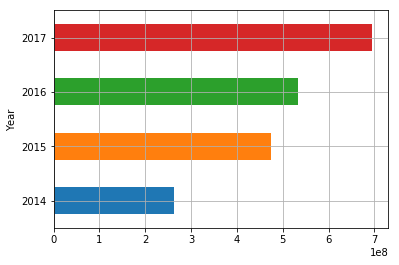

In [696]:
df_World_Import.groupby(['Year'])['count'].aggregate(sum).plot(kind='barh') #Plotting the total expenses on imports per year from the World in a bar chart

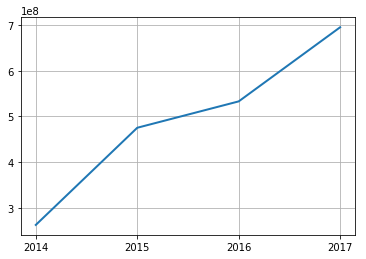

In [697]:
plt.plot(df_World_Import.groupby(['Year'])['count'].aggregate(sum), linewidth=2.0) #Plotting the total expenses on imports per year from the World in a line chart

In [698]:
China_World_Export = China_World[China_World['Trade Flow'] == 'Export']
China_World_Export #Showing only the exported values

,Year,Trade Flow,Trade Value (US$),Netweight (kg),Commodity Code,Trade Value (US$)
1,2017,Export,266020875,96574233,3305,266020875
3,2017,Export,118788938,57766042,330510,118788938
5,2017,Export,5370813,1447114,330520,5370813
7,2017,Export,18604804,6011075,330530,18604804
9,2017,Export,123256320,31350002,330590,123256320
11,2014,Export,299820503,102625523,3305,299820503
13,2015,Export,294224204,105119979,3305,294224204
15,2016,Export,255109682,97907786,3305,255109682
17,2014,Export,145839988,66100912,330510,145839988
19,2015,Export,144933594,69318268,330510,144933594


In [699]:
#Obtaining the total earning on exports per year from the World
Y_2017 = China_World_Export[China_World_Export['Year'] == 2017]  
Y_2016 = China_World_Export[China_World_Export['Year'] == 2016]
Y_2015 = China_World_Export[China_World_Export['Year'] == 2015]
Y_2014 = China_World_Export[China_World_Export['Year'] == 2014]


df_Export = pd.DataFrame({'Year' : ['2017', '2016', '2015', '2014'],
                           'count' : [sum(Y_2017['Trade Value (US$)']), sum(Y_2016['Trade Value (US$)']),
                                      sum(Y_2015['Trade Value (US$)']), sum(Y_2014['Trade Value (US$)'])]})
df_Export

,Year,count
0,2017,Trade Value (US$) 532041750 Trade Value (US...
1,2016,Trade Value (US$) 510219364 Trade Value (US...
2,2015,Trade Value (US$) 588448408 Trade Value (US...
3,2014,Trade Value (US$) 599641006 Trade Value (US...


In [700]:
China_World_Export.groupby(['Year'])[('Trade Value (US$)')].aggregate(sum) #Easier method to perform above piece of code

Year                   
2014  Trade Value (US$)    599641006
      Trade Value (US$)    599641006
2015  Trade Value (US$)    588448408
      Trade Value (US$)    588448408
2016  Trade Value (US$)    510219364
      Trade Value (US$)    510219364
2017  Trade Value (US$)    532041750
      Trade Value (US$)    532041750
Name: Trade Value (US$), dtype: int64

In [701]:
df_World_Export = pd.DataFrame({'Year' : ['2017', '2016', '2015', '2014'],
                           'count' : [532041750, 510219364, 
                                      588448408, 599641006]})
df_World_Export #Visualising the total earning from exports per year from the World

,Year,count
0,2017,532041750
1,2016,510219364
2,2015,588448408
3,2014,599641006


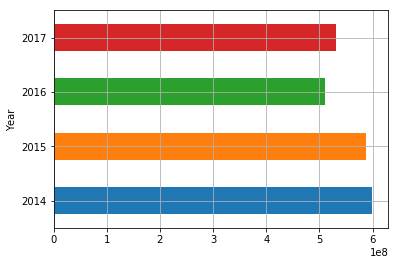

In [702]:
df_World_Export.groupby(['Year'])['count'].aggregate(sum).plot(kind='barh') #Plotting the total earning from exports per year from the World in a bar chart

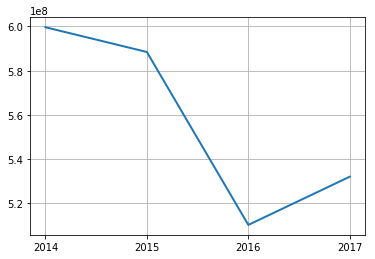

In [703]:
plt.plot(df_World_Export.groupby(['Year'])['count'].aggregate(sum), linewidth=2.0) #Plotting the total earning from exports per year from the World in a line chart

In [704]:
China_USA = pd.read_csv('Haircare CHINA-USA.csv') #Uploading the data for exports and imorts from China with the USA between 2014 and 2017
China_USA.head()

,Classification,Year,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,Reporter ISO,Partner Code,Partner,Partner ISO,Commodity Code,Commodity,Qty Unit,Qty,Alt Qty Unit,Netweight (kg),Trade Value (US$),Flag
0,H5,2017,4,0,1,Import,156,China,CHN,842,USA,USA,3305,Hair preparations; for use on the hair,Weight in kilograms,NaN,2218744,2218744,25164627,6
1,H5,2017,4,0,2,Export,156,China,CHN,842,USA,USA,3305,Hair preparations; for use on the hair,Weight in kilograms,NaN,15965787,15965787,37077602,0
2,H5,2017,6,1,1,Import,156,China,CHN,842,USA,USA,330510,Hair preparations; shampoos,Weight in kilograms,NaN,1452755,1452755,15902040,6
3,H5,2017,6,1,2,Export,156,China,CHN,842,USA,USA,330510,Hair preparations; shampoos,Weight in kilograms,NaN,8818336,8818336,17097239,0
4,H5,2017,6,1,1,Import,156,China,CHN,842,USA,USA,330520,Hair preparations; for permanent waving or str...,Weight in kilograms,NaN,1682,1682,16136,0


In [705]:
COLUMNS = ['Year', 'Trade Flow', 'Trade Value (US$)', 'Netweight (kg)', 'Commodity Code', 'Trade Value (US$)']
China_USA = China_USA[COLUMNS] #Selecting the columns to work with on this table

In [706]:
China_USA_Import = China_USA[China_USA['Trade Flow'] != 'Export']
China_USA_Import #Showing only the imported values

,Year,Trade Flow,Trade Value (US$),Netweight (kg),Commodity Code,Trade Value (US$)
0,2017,Import,25164627,2218744,3305,25164627
2,2017,Import,15902040,1452755,330510,15902040
4,2017,Import,16136,1682,330520,16136
5,2017,Import,411914,29925,330530,411914
7,2017,Import,8834537,734381,330590,8834537
9,2014,Import,7214071,698561,3305,7214071
11,2015,Import,18088900,1615369,3305,18088900
13,2016,Import,16421847,1603770,3305,16421847
15,2014,Import,4428800,445119,330510,4428800
17,2015,Import,10576446,979406,330510,10576446


In [707]:
China_USA_Import.groupby(['Year'])[('Trade Value (US$)')].aggregate(sum) #Visualising the total expenses on imports per year from the USA between 2014 and 2017

Year                   
2014  Trade Value (US$)    14428142
      Trade Value (US$)    14428142
2015  Trade Value (US$)    36177800
      Trade Value (US$)    36177800
2016  Trade Value (US$)    32843694
      Trade Value (US$)    32843694
2017  Trade Value (US$)    50329254
      Trade Value (US$)    50329254
Name: Trade Value (US$), dtype: int64

In [708]:
df_USA_Import = pd.DataFrame({'Year' : ['2018', '2017', '2016', '2015', '2014'],
                           'count' : [23495780, 50329254, 32843694, 
                                      36177800, 14428142]})
df_USA_Import #Visualising the total expenses on imports per year from the USA between 2014 and 2017

,Year,count
0,2018,23495780
1,2017,50329254
2,2016,32843694
3,2015,36177800
4,2014,14428142


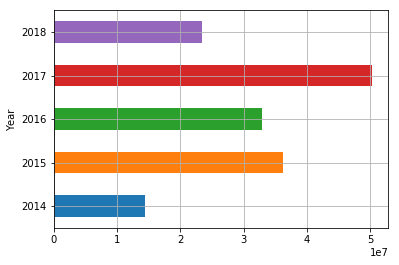

In [709]:
df_USA_Import.groupby(['Year'])['count'].aggregate(sum).plot(kind='barh') #Plotting the total expenses on imports per year from the USA between 2014 and 2017 in a bar chart

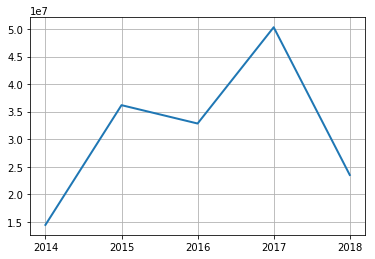

In [710]:
plt.plot(df_USA_Import.groupby(['Year'])['count'].aggregate(sum), linewidth=2.0) #Plotting the total expenses on imports per year from the USA between 2014 and 2017 in a line chart

In [711]:
China_USA_Export = China_USA[China_USA['Trade Flow'] == 'Export']
China_USA_Export #Showing only the exported values

,Year,Trade Flow,Trade Value (US$),Netweight (kg),Commodity Code,Trade Value (US$)
1,2017,Export,37077602,15965787,3305,37077602
3,2017,Export,17097239,8818336,330510,17097239
6,2017,Export,4530534,1689461,330530,4530534
8,2017,Export,15449829,5457990,330590,15449829
10,2014,Export,34113943,15358586,3305,34113943
12,2015,Export,36628016,15615733,3305,36628016
14,2016,Export,34437536,15654398,3305,34437536
16,2014,Export,15907446,8778240,330510,15907446
18,2015,Export,17023581,9058897,330510,17023581
20,2016,Export,16290946,9118117,330510,16290946


In [712]:
China_USA_Export.groupby(['Year'])['Trade Value (US$)'].aggregate(sum)  #Visualising the total earnings from exports per year from the USA between 2014 and 2017

Year                   
2014  Trade Value (US$)    68227886
      Trade Value (US$)    68227886
2015  Trade Value (US$)    73256032
      Trade Value (US$)    73256032
2016  Trade Value (US$)    68875072
      Trade Value (US$)    68875072
2017  Trade Value (US$)    74155204
      Trade Value (US$)    74155204
Name: Trade Value (US$), dtype: int64

In [713]:
df_USA_Export = pd.DataFrame({'Year' : ['2018', '2017', '2016', '2015', '2014'],
                           'count' : [114797336, 74155204, 68875072, 
                                      73256032, 68227886]})
df_USA_Export #Visualising the total earnings from exports per year from the USA between 2014 and 2017

,Year,count
0,2018,114797336
1,2017,74155204
2,2016,68875072
3,2015,73256032
4,2014,68227886


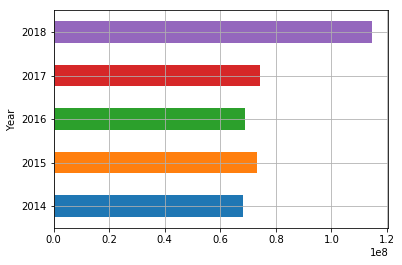

In [714]:
df_USA_Export.groupby(['Year'])['count'].aggregate(sum).plot(kind='barh') #Plotting the total earnings from exports per year from the USA between 2014 and 2017 in a bar chart

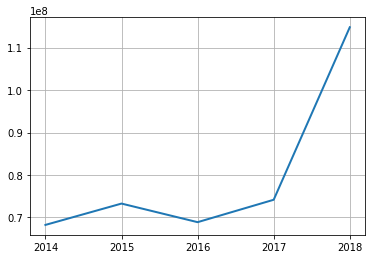

In [715]:
plt.plot(df_USA_Export.groupby(['Year'])['count'].aggregate(sum), linewidth=2.0) #Plotting the total earnings from exports per year from the USA between 2014 and 2017 in a line chart

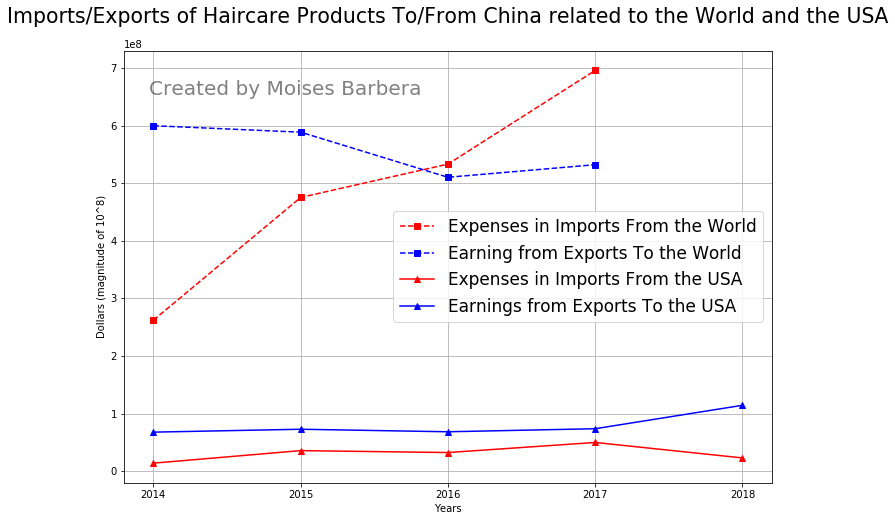

In [716]:
I_W = df_World_Import.groupby(['Year'])['count'].aggregate(sum) #Show total Expenses in Imports From the World between 2014-2017
E_W = df_World_Export.groupby(['Year'])['count'].aggregate(sum) #Show total Earning from Exports To the World between 2014-2017
I_U = df_USA_Import.groupby(['Year'])['count'].aggregate(sum) #Show total Expenses in Imports From the USA between 2014-2018
E_U = df_USA_Export.groupby(['Year'])['count'].aggregate(sum) #Show total Earning from Exports To the USA between 2014-2018

fig = plt.figure() #Create a blank graph

ax = fig.add_axes([0,0,1.5,1.5]) #Add axis

plt.rcParams.update({'font.size': 17}) #Set size of the words to 17
ax.plot(I_W, 'rs--', label="Expenses in Imports From the World") #Upload total Expenses in Imports From the World to the graph and add a legend
ax.plot(E_W, 'bs--', label="Earning from Exports To the World") #Upload total Earning from Exports To the World to the graph and add a legend
    
ax.plot(I_U, 'r^', label="Expenses in Imports From the USA", linestyle='-') #Upload total Expenses in Imports From the USA to the graph and add a legend
ax.plot(E_U, 'b^', label="Earnings from Exports To the USA", linestyle='-') #Upload total Earning from Exports To the USA to the graph and add a legend

fig.text(0.69, 1.40, 'Created by Moises Barbera',
         fontsize=20, color='black',
         ha='right', va='top', alpha=1.5)  #Add Watermark

ax.legend() #Create the legend
ax.set_xlabel('Years') #Add x axis title
ax.set_ylabel('Dollars (magnitude of 10^8)') #Add y axis title
ax.set_title('Imports/Exports of Haircare Products To/From China related to the World and the USA').set_position([.5, 1.05]) #Add title
fig.savefig('Revenue.png', bbox_inches='tight') #Save the image to computer as Revenue.png

In [717]:
I_Total2017 = 50329254
I_Total2018 = 23495780
print(((I_Total2018-I_Total2017)/I_Total2017)*100)

-53.315858804503634


Since 2014 China has spent less money buying haircare products from USA (53.31% less) compared to the almost exponential increase in buying haircare products from the WORLD.

In [718]:
I_Total2018 = 23495780
E_Total2018 = 114797336
a = E_Total2018 - I_Total2018
print(a)

91301556


In [719]:
I_Total2017 = 50329254
E_Total2017 = 74155204
b = E_Total2017 - I_Total2017
print(b)

23825950


In [720]:
print(((a-b)/b)*100)

283.2021640270377


In 2018 the Trade Deficit of Haircare Products from USA with China was of 91.30 million dollars, an increment of 283.20% compared to the 2.38 million in deficit in this sector of products.

In [721]:
I_Total2017 = 50329254
IW_Total2017= 695512660
c = IW_Total2017/I_Total2017
print(c)

13.81925231794614


USA had 13.81% of the haircare market of the World during 2017

Created by @MoisesBarbera

https://www.github.com/MoisesBarbera // https://www.linkedin.com/in/moises-barbera-ramos-8a3848164/

moisesphysics@gmail.com